In [1]:
import pandas as pd

# Load Dataset

In [2]:
train = pd.read_csv("data/titanic/train.csv")

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test= pd.read_csv('data/titanic/test.csv')

In [5]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


## Explore

In [6]:
import seaborn as sns

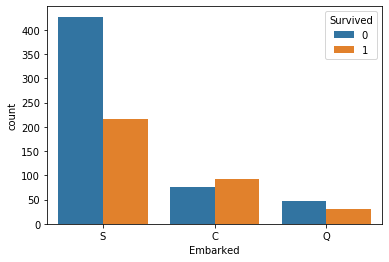

In [7]:
sns.countplot(data=train, x='Embarked',hue="Survived")

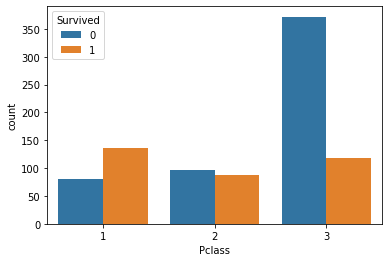

In [8]:
sns.countplot(data= train, x='Pclass',hue='Survived')

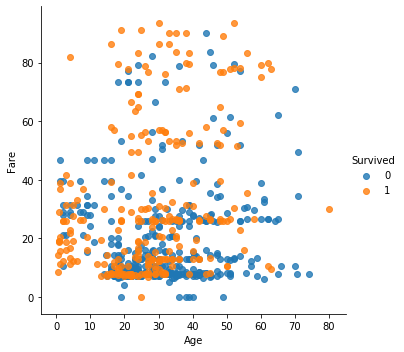

In [9]:
low_fare = train[train["Fare"] < 100]
sns.lmplot(data=low_fare, x='Age',y='Fare',hue='Survived', fit_reg=False)

## Preprocessing


#### Encode Sex

In [10]:
train["Sex_encode"]= train["Sex"].replace("male",0).replace("female",1)

train[['Sex','Sex_encode']].head()

,Sex,Sex_encode
0,male,0
1,female,1
2,female,1
3,female,1
4,male,0


In [11]:
test["Sex_encode"]= test["Sex"].replace("male",0).replace("female",1)

test[['Sex','Sex_encode']].head()

,Sex,Sex_encode
0,male,0
1,female,1
2,male,0
3,male,0
4,female,1


### Fill in missing Fare

In [12]:
test["Fare"] = test["Fare"].fillna(0)
# train데이터에 Fare nan값 없음
# train[train["Fare"].isnull()]
test[test["Fare"].isnull()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_encode


### Fill in missing Age

In [13]:
# Age null 값에 평균나이를 입력 
train["Age(fill)"] = train["Age"].fillna(round(train["Age"].mean(),2))

In [14]:
train[['Age',"Age(fill)"]]

,Age,Age(fill)
0,22.0,22.0
1,38.0,38.0
2,26.0,26.0
3,35.0,35.0
4,35.0,35.0
...,...,...
886,27.0,27.0
887,19.0,19.0
888,NaN,29.7
889,26.0,26.0


In [15]:
# Age null 값에 평균나이를 입력 
test["Age(fill)"] = test["Age"].fillna(round(test["Age"].mean(),2))

In [16]:
test[['Age',"Age(fill)"]]

,Age,Age(fill)
0,34.5,34.50
1,47.0,47.00
2,62.0,62.00
3,27.0,27.00
4,22.0,22.00
...,...,...
413,NaN,30.27
414,39.0,39.00
415,38.5,38.50
416,NaN,30.27


### 나이를 일정구역으로 나눠서 

  1. 나이가 15세 미만인 승객.
  2. 나이가 15세 이상이고 30세 미만인 승객.
  3. 나이가 30세 이상인 승객.

In [17]:
train.loc[train["Age"] < 15 ,"AgeType"] = "Young"
train.loc[(train["Age"] >= 15) & (train["Age"] < 30), "AgeType"] = "Medium"
train.loc[train["Age"] >= 30 , "AgeType"] = "Old"

In [18]:
train[["Age","AgeType"]]

,Age,AgeType
0,22.0,Medium
1,38.0,Old
2,26.0,Medium
3,35.0,Old
4,35.0,Old
...,...,...
886,27.0,Medium
887,19.0,Medium
888,NaN,NaN
889,26.0,Medium


In [19]:
young = train["AgeType"] == "Young"
medium = train["AgeType"] == "Medium"
old = train["AgeType"] == "Old"

In [20]:
train.groupby("AgeType")["Survived"].mean()

AgeType
Medium    0.362745
Old       0.406061
Young     0.576923
Name: Survived, dtype: float64

### Age 빈칸에 채우기 

In [21]:
train.loc[train["Age"].isnull(), "AgeBlank"] = "Blank"
train.loc[train["Age"].notnull(),"AgeBlank"] = "Not Blank"

In [22]:
train[["Age","AgeBlank"]]

,Age,AgeBlank
0,22.0,Not Blank
1,38.0,Not Blank
2,26.0,Not Blank
3,35.0,Not Blank
4,35.0,Not Blank
...,...,...
886,27.0,Not Blank
887,19.0,Not Blank
888,NaN,Blank
889,26.0,Not Blank


In [23]:
train.groupby("AgeBlank")["Survived"].mean()

AgeBlank
Blank        0.293785
Not Blank    0.406162
Name: Survived, dtype: float64

In [24]:
pd.pivot_table(data=train, index= "AgeBlank", values= "Survived")

,Survived
AgeBlank,
Blank,0.293785
Not Blank,0.406162


### Pclass별 나이(Age)의 평균을 구한 뒤 빈 값에 채워주세요.

In [25]:
mean_age_by_pclass = train.groupby("Pclass")["Age"].mean()
mean_age_by_pclass

Pclass
1    38.233441
2    29.877630
3    25.140620
Name: Age, dtype: float64

In [26]:
train["Age(fil)"] = train["Age"]

In [27]:
train.loc[(train["Pclass"] == 1) & (train["Age"].isnull()), "Age(fill)"] = mean_age_by_pclass[1]
train.loc[(train["Pclass"] == 2) & (train["Age"].isnull()), "Age(fill)"] = mean_age_by_pclass[2]
train.loc[(train["Pclass"] == 3) & (train["Age"].isnull()), "Age(fill)"] = mean_age_by_pclass[3]

In [28]:
test.loc[(test["Pclass"] == 1) & (test["Age"].isnull()), "Age(fill)"] = mean_age_by_pclass[1]
test.loc[(test["Pclass"] == 2) & (test["Age"].isnull()), "Age(fill)"] = mean_age_by_pclass[2]
test.loc[(test["Pclass"] == 3) & (test["Age"].isnull()), "Age(fill)"] = mean_age_by_pclass[3]

In [29]:
train[["Age","Age(fill)"]]
test[["Age","Age(fill)"]]

,Age,Age(fill)
0,34.5,34.50000
1,47.0,47.00000
2,62.0,62.00000
3,27.0,27.00000
4,22.0,22.00000
...,...,...
413,NaN,25.14062
414,39.0,39.00000
415,38.5,38.50000
416,NaN,25.14062


In [30]:
train.loc[train["Age"].isnull(), ["Pclass","Age","Age(fill)"]].head(10)
test.loc[train["Age"].isnull(), ["Pclass","Age","Age(fill)"]].head(10)

,Pclass,Age,Age(fill)
5,3,14.0,14.00000
17,3,21.0,21.00000
19,3,45.0,45.00000
26,1,22.0,22.00000
28,1,41.0,41.00000
29,3,NaN,25.14062
31,2,24.0,24.00000
32,3,33.0,33.00000
36,3,NaN,25.14062
42,3,41.0,41.00000


### Single

In [31]:
train["Single"] = (train["SibSp"] == 0) & (train["Parch"]==0)
test["Single"] = (test["SibSp"] == 0) & (test["Parch"]==0)

train[["SibSp","Parch","Single"]]
test[["SibSp","Parch","Single"]]

,SibSp,Parch,Single
0,0,0,True
1,1,0,False
2,0,0,True
3,0,0,True
4,1,1,False
...,...,...,...
413,0,0,True
414,0,0,True
415,0,0,True
416,0,0,True


### Family Size

In [32]:
train["FamilySize"] = train["SibSp"] + train["Parch"] +1 
train[["FamilySize"]]
test["FamilySize"] = test["SibSp"] + test["Parch"] +1 
test[["FamilySize"]]

,FamilySize
0,1
1,2
2,1
3,1
4,3
...,...
413,1
414,1
415,1
416,1


In [33]:
pd.pivot_table(data= train, index="FamilySize", values="Survived")

,Survived
FamilySize,
1,0.303538
2,0.552795
3,0.578431
4,0.724138
5,0.200000
6,0.136364
7,0.333333
8,0.000000
11,0.000000


### 핵가족과 대가족

In [34]:
train.loc[train["FamilySize"] == 1 , "Familytype"] = 1
train.loc[(train["FamilySize"]>= 2) & (train["FamilySize"] < 5) , "Familytype"] = 2
train.loc[train["FamilySize"] >= 5 , "Familytype"] = 3

In [35]:
test.loc[test["FamilySize"] == 1 , "Familytype"] = 1
test.loc[(test["FamilySize"]>= 2) & (test["FamilySize"] < 5) , "Familytype"] = 2
test.loc[test["FamilySize"] >= 5 , "Familytype"] = 3

In [36]:
train["Familytype"]
test["Familytype"]

0      1.0
1      2.0
2      1.0
3      1.0
4      2.0
      ... 
413    1.0
414    1.0
415    1.0
416    1.0
417    2.0
Name: Familytype, Length: 418, dtype: float64

### Embarked

In [37]:
train["Embarked"].isnull().sum()    # null값 2개 
train.groupby("Embarked")["Survived"].sum()  # 가장 맣은 S를 null값에 투입 

Embarked
C     93
Q     30
S    217
Name: Survived, dtype: int64

In [38]:
# fillna() 사용해서 null 값 채우기 
train["Embarked(fill)"] = train["Embarked"].fillna("S")
test["Embarked(fill)"] = test["Embarked"].fillna("S")

In [39]:
train[["Embarked(fill)"]].isnull().sum()
test[["Embarked(fill)"]].isnull().sum()

Embarked(fill)    0
dtype: int64

In [40]:
# 원핫 인코딩으로 변환 시켜라
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [41]:
em_one_hot= pd.get_dummies(train["Embarked"])
em_one_hot["S"]

0      1
1      0
2      1
3      1
4      1
      ..
886    1
887    1
888    1
889    0
890    0
Name: S, Length: 891, dtype: uint8

In [42]:
em_one_hot= pd.get_dummies(test["Embarked"])
em_one_hot["S"]

0      0
1      1
2      0
3      1
4      1
      ..
413    1
414    0
415    1
416    1
417    0
Name: S, Length: 418, dtype: uint8

In [43]:
# get dummies
train.loc[train["Embarked"]=="C","Embarked_C"] = em_one_hot["C"]
train.loc[train["Embarked"]=="S","Embarked_S"] = em_one_hot["S"]
train.loc[train["Embarked"]=="Q","Embarked_Q"] = em_one_hot["Q"]
train[["Embarked","Embarked_C","Embarked_S","Embarked_Q"]]

,Embarked,Embarked_C,Embarked_S,Embarked_Q
0,S,NaN,0.0,NaN
1,C,0.0,NaN,NaN
2,S,NaN,0.0,NaN
3,S,NaN,1.0,NaN
4,S,NaN,1.0,NaN
...,...,...,...,...
886,S,NaN,NaN,NaN
887,S,NaN,NaN,NaN
888,S,NaN,NaN,NaN
889,C,NaN,NaN,NaN


In [44]:
# get dummies
test.loc[test["Embarked"]=="C","Embarked_C"] = em_one_hot["C"]
test.loc[test["Embarked"]=="S","Embarked_S"] = em_one_hot["S"]
test.loc[test["Embarked"]=="Q","Embarked_Q"] = em_one_hot["Q"]
test[["Embarked","Embarked_C","Embarked_S","Embarked_Q"]]

,Embarked,Embarked_C,Embarked_S,Embarked_Q
0,Q,NaN,NaN,1.0
1,S,NaN,1.0,NaN
2,Q,NaN,NaN,1.0
3,S,NaN,1.0,NaN
4,S,NaN,1.0,NaN
...,...,...,...,...
413,S,NaN,1.0,NaN
414,C,1.0,NaN,NaN
415,S,NaN,1.0,NaN
416,S,NaN,1.0,NaN


In [69]:
train['Embarked_clean'] = train['Embarked'].astype('category').cat.codes
test['Embarked_clean'] = test['Embarked'].astype('category').cat.codes

In [70]:
train[['Embarked_clean']]
test[['Embarked_clean']]

,Embarked_clean
0,1
1,2
2,1
3,2
4,2
...,...
413,2
414,0
415,2
416,2


In [45]:
#nan 값 0 으로 
train["Embarked_C"] = train["Embarked_C"].fillna(0)
train["Embarked_S"] = train["Embarked_S"].fillna(0)
train["Embarked_Q"] = train["Embarked_Q"].fillna(0)
train[["Embarked_C","Embarked_Q","Embarked_S"]]

,Embarked_C,Embarked_Q,Embarked_S
0,0.0,0.0,0.0
1,0.0,0.0,0.0
2,0.0,0.0,0.0
3,0.0,0.0,1.0
4,0.0,0.0,1.0
...,...,...,...
886,0.0,0.0,0.0
887,0.0,0.0,0.0
888,0.0,0.0,0.0
889,0.0,0.0,0.0


In [46]:
#nan 값 0 으로 
test["Embarked_C"] = test["Embarked_C"].fillna(0)
test["Embarked_S"] = test["Embarked_S"].fillna(0)
test["Embarked_Q"] = test["Embarked_Q"].fillna(0)
test[["Embarked_C","Embarked_Q","Embarked_S"]]

,Embarked_C,Embarked_Q,Embarked_S
0,0.0,1.0,0.0
1,0.0,0.0,1.0
2,0.0,1.0,0.0
3,0.0,0.0,1.0
4,0.0,0.0,1.0
...,...,...,...
413,0.0,0.0,1.0
414,1.0,0.0,0.0
415,0.0,0.0,1.0
416,0.0,0.0,1.0


###  Title

In [88]:
train[["Name"]].head()

,Name
0,"Braund, Mr. Owen Harris"
1,"Cumings, Mrs. John Bradley (Florence Briggs Th..."
2,"Heikkinen, Miss. Laina"
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)"
4,"Allen, Mr. William Henry"


In [90]:
train["Title"] = train["Name"].str.extract("([A-Za-z]+)\.",expand=False)
test["Title"] = test["Name"].str.extract("([A-Za-z]+)\.",expand=False)

In [93]:
train[["Title"]].head()
test[["Title"]].head()

,Title
0,Mr
1,Mrs
2,Mr
3,Mr
4,Mrs


In [111]:
train["Title"].value_counts()
test["Title"].value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Other       7
Name: Title, dtype: int64

In [108]:
train["Title"]= train["Title"].replace(["Dr","Rev","Col","Major","Mlle",
                        "Mme","Capt","Countess","Don","Sir",
                        "Lady","Ms","Jonkheer","Dona"],
                       "Other")

In [109]:
test["Title"]= test["Title"].replace(["Dr","Rev","Col","Major","Mlle",
                        "Mme","Capt","Countess","Don","Sir",
                        "Lady","Ms","Jonkheer","Dona"],
                       "Other")

In [115]:
train["Title_clean"]=train["Title"].astype("category").cat.codes
test["Title_clean"]=test["Title"].astype("category").cat.codes

train[["Title_clean"]].head()
test[["Title_clean"]].head()

,Title_clean
0,2
1,3
2,2
3,2
4,3


##  Train

In [ ]:
# Feature(x) - Pclass, Sex, Fare, ...
# Label(y)  - Survived

In [196]:
# feature_names =['Pclass',"Sex_encode","Fare"]
# feature_names =['Pclass',"Sex_encode","Age(fill)"]        # 0.76315
# feature_names =['Pclass',"Sex_encode","Fare","Age(fill)"] # 0.77751
# Pclass별 평균나이 대입 
# feature_names =['Pclass',"Sex_encode","Age(fill)"]        # 0.75358
# feature_names =['Pclass',"Sex_encode","Age(fill)","FamilySize"] # 0.77033        
# feature_names =['Pclass',"Sex_encode","Age(fill)","Single"] # 0.76076      
# feature_names =['Pclass',"Sex_encode","Age(fill)","Single","Fare","FamilySize"]
# md = 1  >> 0.76555  , md =10 >> 0.73205
# feature_names =['Pclass',"Sex_encode","Fare","Age(fill)","Familytype","Embarked_C","Embarked_S","Embarked_Q"] #0.777
# feature_names =['Pclass',"Sex_encode","Fare","Age(fill)","FamilySize","Single","Embarked_C","Embarked_S","Embarked_Q"] # 0.76076
# feature_names =['Pclass',"SibSp","Parch","Sex_encode","Embarked_clean","FamilySize","Single","Age(fill)","Fare"]  #0.77033
# feature_names =['Pclass',"SibSp","Parch","Sex_encode","Embarked_clean","FamilySize","Single",'Title_clean',"Age(fill)","Fare"] #0.77990

feature_names =['Pclass',
                "Sex_encode",
                "Fare",
                "Embarked_C",
                "Embarked_S",
                "Embarked_Q",
                "FamilySize",
                "Single",
                'Title_clean',
                "Age(fill)"
                ]
feature_names
# 목표 0.79

['Pclass',
 'Sex_encode',
 'Fare',
 'Embarked_C',
 'Embarked_S',
 'Embarked_Q',
 'FamilySize',
 'Single',
 'Title_clean',
 'Age(fill)']

In [197]:
X = train[feature_names]
X.head()

,Pclass,Sex_encode,Fare,Embarked_C,Embarked_S,Embarked_Q,FamilySize,Single,Title_clean,Age(fill)
0,3,0,7.2500,0.0,0.0,0.0,2,False,2,22.0
1,1,1,71.2833,0.0,0.0,0.0,2,False,3,38.0
2,3,1,7.9250,0.0,0.0,0.0,1,True,1,26.0
3,1,1,53.1000,0.0,1.0,0.0,2,False,3,35.0
4,3,0,8.0500,0.0,1.0,0.0,1,True,2,35.0


In [198]:
label_name = "Survived"

y = train[label_name]
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [199]:
# train.head()
# train.info()

## Use Decision Tree

In [207]:
#scikit-learn == sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
model = DecisionTreeClassifier(max_depth = 10)
# model = GradientBoostingClassifier(random_state=0)
# model = RandomForestClassifier()
# model = LinearRegression()
# model = LogisticRegression()
model

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [208]:
# 1) fit(train) ->  2) predict(test)
model.fit(X,y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

# Visualize

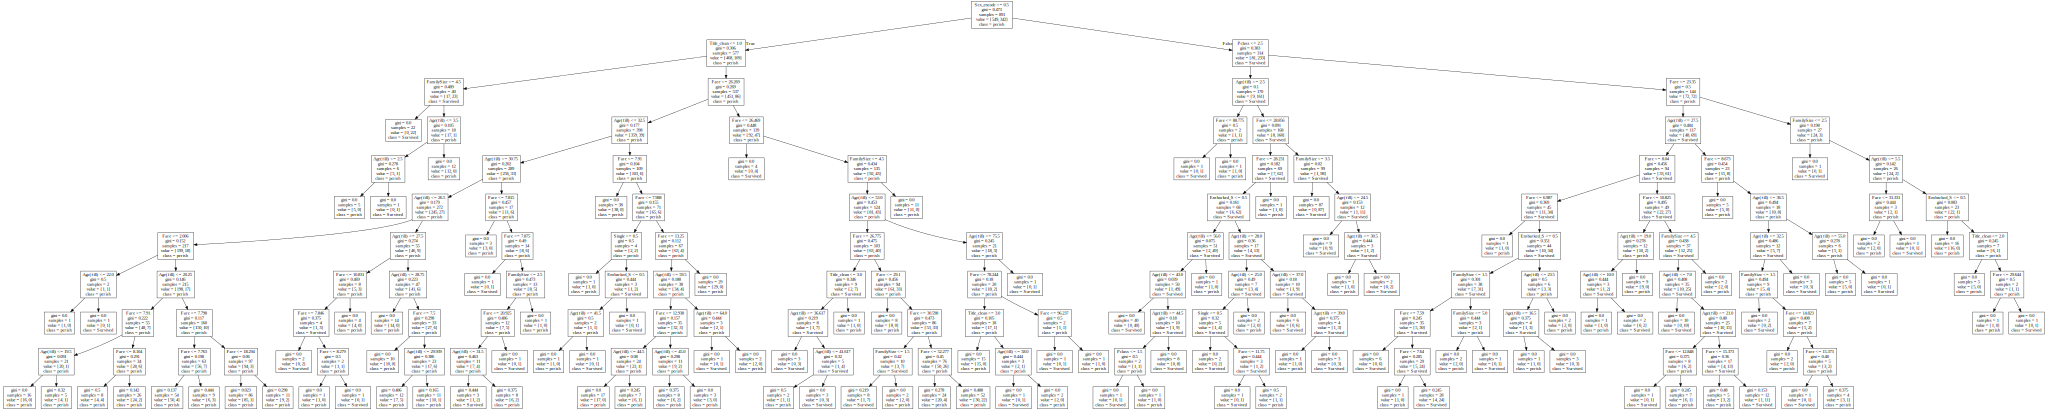

In [209]:
import graphviz
from sklearn.tree import export_graphviz

tree = export_graphviz(model,
                      feature_names = feature_names,
                      class_names = ["perish","Survived"])

graphviz.Source(tree)

### Predict

In [210]:
# test
X_test = test[feature_names]

In [214]:
prediction_list = model.predict(X_test)
prediction_list

array([0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

### Submit

In [212]:
submit = pd.read_csv('data/titanic/gender_submission.csv')

submit["Survived"] = prediction_list

submit.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,1
3,895,1
4,896,0


In [213]:
submit.to_csv('Deciciontree+embarked.csv',index = False)

## Decision Tree를 왜 사용하는가?
<hr/>   
   
   >3가지
   1. 점수가 잘나옴
   2. 모든 분야에서 쓸 수 있는 범용적인 방법
   3. - 전문가의 최대 점수는 84를 넘기기 힘들다 
          + 확보하고 있는 데이터가 미래를 전부 대변할수 없기 때문
          + 모든 데이터 셋은 기본적인 셀링이 존재함
      - 전문가와 5%의 오차밖에 나지않음 
          + 인공지능 머신러닝 알고리즘과 전문가의 차이(사람 vs 컴퓨터) 

파이썬 설치법
    bit.ly/ds-python-install

In [ ]:
1. 대가족과 핵 가족

2. max depth 